(9, 4)


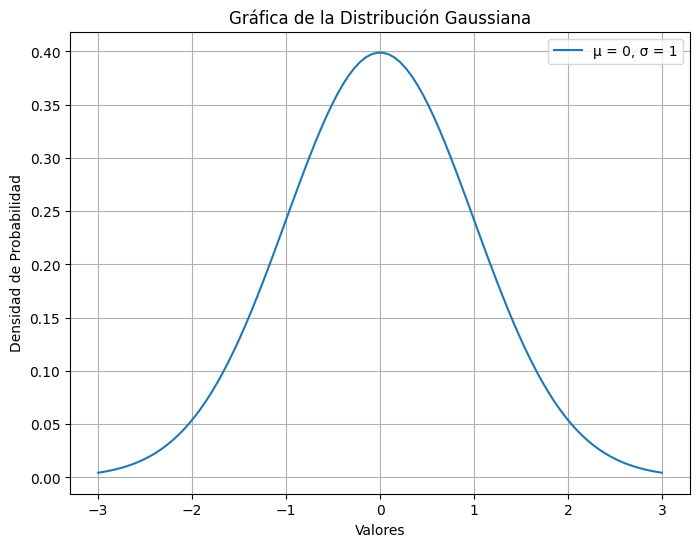

2   -2.133458
7   -4.885128
8    0.654871
9   -0.966634
Name: y, dtype: float64


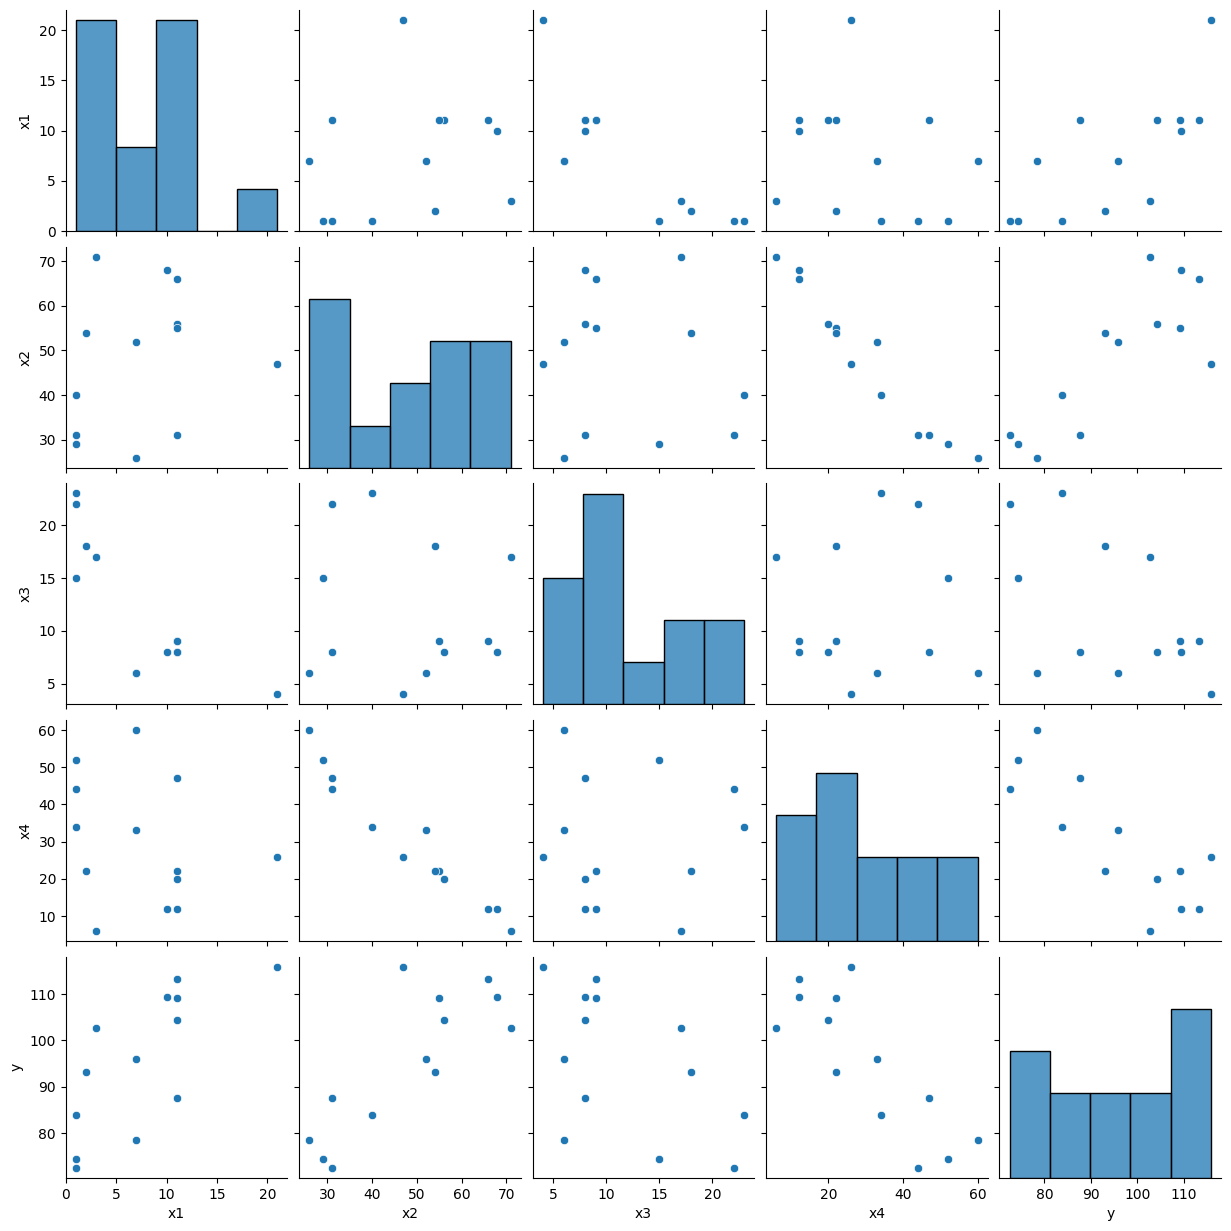

In [15]:
import pandas as pd
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

df = pd.read_excel('regresionM.xlsx')
df.head()

#X = df[['x1'],['x2'],['x3'],['x4']]
X = df[['x1','x2','x3','x4']]
y = df['y']

xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.25)

print(xTrain.shape)

# Define los parámetros de la distribución Gaussiana
# mu (μ): media o valor esperado [1]
# sigma (σ): desviación típica [1]
mu = 0  # Puedes cambiar este valor por la media de tus datos
sigma = 1 # Puedes cambiar este valor por la desviación estándar de tus datos

# Crea un rango de valores x
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

# Calcula la función de densidad de probabilidad (PDF) para cada valor x
pdf = norm.pdf(x, mu, sigma)

# Crea la gráfica
plt.figure(figsize=(8, 6))
plt.plot(x, pdf, label=f'μ = {mu}, σ = {sigma}')
plt.title('Gráfica de la Distribución Gaussiana')
plt.xlabel('Valores')
plt.ylabel('Densidad de Probabilidad')
plt.grid(True)
plt.legend()
plt.show()

regressor = LinearRegression()
regressor.fit(xTrain, yTrain)

yPred = regressor.predict(xTest)

error = yTest - yPred
print(error)

# Combina las variables X y y en un DataFrame para el pairplot
df_combined = X.copy()
df_combined['y'] = y

# Crea el pairplot
sns.pairplot(df_combined)

# Muestra el gráfico
plt.show()


error es igual xTest menos yPred